# Titanic Passenger Survival Model

## Introduction

Embarking on the analysis of the Titanic dataset presents a unique challenge and an opportunity to delve into the annals of history. The assignment objective is to construct a predictive model to discern the fate of Titanic passengers based on an array of features. This assignment encapsulates a binary classification problem, where the mission is to develop an algorithm capable of accurately classifying individuals as survivors or victims. The journey to a successful solution involves navigating through crucial steps such as data preprocessing, exploratory data analysis, feature engineering, and model building. By threading through these intricacies, we aim to not only build a predictive model but also unravel insights into the factors that influenced survival aboard the Titanic. Let's embark on this analytical voyage into history, armed with machine learning tools and a commitment to unravel the stories hidden within the Titanic dataset.

![Image Alt Text](https://images.unsplash.com/photo-1561554250-0086e85c2042?q=80&w=1630&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## Libraries and Imports

In [1]:
# Install required packages
!pip install numpy
!pip install pandas
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
import optuna
from optuna.samplers import TPESampler
import pickle

In [3]:
# Read in datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

## Data Exploration

### Basic Analysis

Look at the first few rows, data types, summary statistics, and shape of the dataset.

#### Column Information:
    - PassengerId: A unique identifier assigned to each passenger.
    - Survived: Indicates whether the passenger survived or not. (0 = No, 1 = Yes)
    - Pclass: Represents the ticket class. (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name: Name of the passenger.
    - Sex: Gender of the passenger.
    - Age: Age of the passenger in years.
    - SibSp: Number of siblings or spouses aboard the Titanic.
    - Parch: Number of parents or children aboard the Titanic.
    - Ticket: Ticket number.
    - Fare: Fare paid for the ticket.
    - Cabin: Cabin number where the passenger stayed.
    - Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) where the passenger boarded the ship.
    

### Train Data

This dataset will be used for model training and model validation.

#### Data Head:

In [4]:
# View dataset head
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Types:

In [5]:
# View dataset type and number of non-null records
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Dataset Shape:

In [6]:
# View dataset shape
train_df.shape

(891, 12)

### Test Data

This dataset will be used to test the model.

#### Data Head:

In [7]:
# View dataset head
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data Type:

In [8]:
# View dataset type and number of non-null records
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Dataset Shape:

In [9]:
# View dataset shape
test_df.shape

(418, 11)

### Gender Submission

This dataset will be used to determine the the model metrics for the test dataset.

#### Data Head:

In [10]:
# View dataset head
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Data Types:

In [11]:
# View dataset type and number of non-null records
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


#### Dataset Shape:

In [12]:
# View dataset shape
gender_df.shape

(418, 2)

## Pre-processing

### Missing Values

Dealing with missing values in a small dataset requires careful consideration to retain data integrity while handling the absence of information.

#### Identify Missing Values:

From the datasets' information the following columns are identified as having missing values:

<table>
  <tr>
    <th>Train</th>
    <th>% Missing</th>      
    <th>Test</th>
    <th>% Missing</th>
    <th>Gender Submission</th>
    <th>% Missing</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>19.865</td>
    <td>Age</td>
    <td>20.574</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>77.104</td>
    <td>Fare</td>
    <td>0.239</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>0.224</td>
    <td>Cabin</td>
    <td>78.229</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>


In [13]:
df_list = [train_df, test_df, gender_df] # list of datasets

# Compute percentage missing data for features missing data
for dataset in df_list:
    for feature in dataset.columns:
        if(len(dataset) != len(dataset[dataset[feature].notna()])):
            count = dataset[feature].isna().sum()
            percent = 100*count/len(dataset)
            print(f"{feature} - Missing Count: {count} - Missing %: {percent}")

Age - Missing Count: 177 - Missing %: 19.865319865319865
Cabin - Missing Count: 687 - Missing %: 77.10437710437711
Embarked - Missing Count: 2 - Missing %: 0.2244668911335578
Age - Missing Count: 86 - Missing %: 20.574162679425836
Fare - Missing Count: 1 - Missing %: 0.23923444976076555
Cabin - Missing Count: 327 - Missing %: 78.22966507177034


#### Understand the Reason for Missing Data:
Determine why the data is missing. It could be due to errors, non-response, or other reasons.

Age: Missing for about 20% of the passengers. Reasons could include data recording errors, passengers not providing their age, or certain age groups being less likely to have their age recorded.

Cabin: Missing for about 77% of the passengers. This could be due to various reasons such as incomplete records, some passengers not being assigned cabins, or the data not being collected properly.

Embarked: Missing for a very small percentage (less than 1%) of passengers. This could be due to oversight during data collection or missing records.

Fare: Missing for a very small percentage (less than 1%) of passengers. It might be due to data recording errors or omissions during data entry.

#### Remove Rows or Columns:
If the missing values are few and don’t significantly impact your analysis, deleting rows or columns with missing values can be an option. However, in a small dataset, losing data might not be ideal.

Proportion of Missing Values: If a large proportion of a feature's values are missing, especially over 50% or more, it might be considered for exclusion. In this dataset, the "Cabin" feature has around 77% missing values, which could be a candidate for exclusion.

In [14]:
# Drop columns missing significant number of data points
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

#### Imputation:
Replace missing values with a statistic like the mean, median, mode, or a more sophisticated method (like regression imputation). Imputation helps to retain data while filling in the gaps.

Feature Importance: Consider the significance of the feature in predicting the target variable (survival in this case). Features like "Age" might be crucial in understanding survival patterns, and missing values might be imputed to retain its predictive power.

In [15]:
train_df['Age'] = train_df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'] = test_df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

### Categorical Variable Encoding

In this section dedicated to enhancing the Titanic dataset for predictive modeling, we focus on the task of categorical variable encoding. Specifically, we address the 'Sex' and 'Embarked' features, crucial components of passenger demographics and boarding locations. One-Hot Encoding is applied to the 'Embarked' and 'Sex' variables, creating binary columns ('Embarked_C', 'Embarked_Q', 'Embarked_S') for each port of embarkation ('C', 'Q', 'S') and a single binary column for sex. This transformation not only ensures seamless integration with machine learning algorithms but also enables a more nuanced understanding of the dataset, laying a foundation for robust predictive modeling on the Titanic dataset.

In [16]:
def encode_categories(df, categories):
    one_hot_encoder = OneHotEncoder(sparse_output=False,drop='first')
    encoded_columns = one_hot_encoder.fit_transform(df[categories])

    # Create new columns with the encoded values
    encoded_df = pd.DataFrame(
        encoded_columns,
        columns=one_hot_encoder.get_feature_names_out(categories)
    )
    
    return pd.concat([df, encoded_df], axis=1).drop(categories, axis=1)

In [17]:
train_df = encode_categories(train_df, ['Sex', 'Embarked'])
test_df = encode_categories(test_df, ['Sex', 'Embarked'])

### Numerical Variable Standardization

In this section our attention shifts to the task of numerical variable standardization. Numerical attributes like 'Age' and 'Fare' often exhibit disparate scales, potentially affecting the performance of machine learning models. Employing standardization, we bring these features onto a common scale. Taking 'Age' as an example, a standardization method is applied, centering the variable around its mean and scaling it based on its standard deviation. This normalization ensures uniformity in scale, minimizing the influence of outliers and facilitating improved pattern recognition for machine learning algorithms. The same standardization process is extended to the 'Fare' feature, establishing a consistent scale across numerical variables. This strategic standardization enhances the model's ability to process data effectively, contributing to a more accurate and robust predictive analysis on the Titanic dataset.

In [18]:
numerical_features = ['Age', 'Fare']

def standardize_numerical(df, features):
    X_numerical = df[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numerical)

#     df[features] = X_scaled
    return X_scaled

In [19]:
train_df[numerical_features] = standardize_numerical(train_df, numerical_features)
test_df[numerical_features] = standardize_numerical(test_df, numerical_features)

### Duplicate Values

Duplicate rows can inadvertently skew analyses, compromise model training, and lead to inaccurate results. To identify and address these redundancies, examination of the dataset is necessary. This involves comparing rows across all features to pinpoint instances where every attribute has an identical match.

In [20]:
print(f"train: {train_df.duplicated().sum()} \ntest: {test_df.duplicated().sum()}")

train: 0 
test: 0


It appears that there are no duplicate values in either of the datasets.

## Exploritory Data Analysis

Exploratory Data Analysis (EDA) is an indispensable phase in the journey of unraveling insights from a dataset. This iterative and investigative process involves a comprehensive examination of the dataset's structure, distributions, and relationships between variables. Through the application of statistical and visualization techniques, EDA aims to uncover patterns, trends, and potential outliers within the data, providing a foundational understanding before modeling. By employing tools such as histograms, scatter plots, and correlation matrices, EDA offers a nuanced glimpse into the dataset's nuances, guiding subsequent analytical decisions.

### Univariate Analysis

Univariate analysis is a foundational component of exploratory data analysis, focusing on the examination of individual variables in isolation. This analytical approach seeks to understand the distribution, central tendencies, and variability of each variable within the dataset. Univariate analysis provides a comprehensive overview of the characteristics of a single variable. Visualization tools like histograms and box plots further enhance our understanding by illustrating the frequency and distribution patterns. Univariate analysis serves as a fundamental step in identifying outliers, assessing data quality, and gaining initial insights into the nature of each variable before delving into more complex multivariate analyses.|

In [21]:
dataset_names = ['train_df', 'test_df', 'gender_df']
for i, df in enumerate(df_list):
    print(f"{dataset_names[i]} Summary:")
    print(df.describe())
    print("\n")

train_df Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.736034    0.523008   
std     257.353842    0.486592    0.836071   13.014897    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


test_df Summary:
       PassengerId      Pclass         Age  

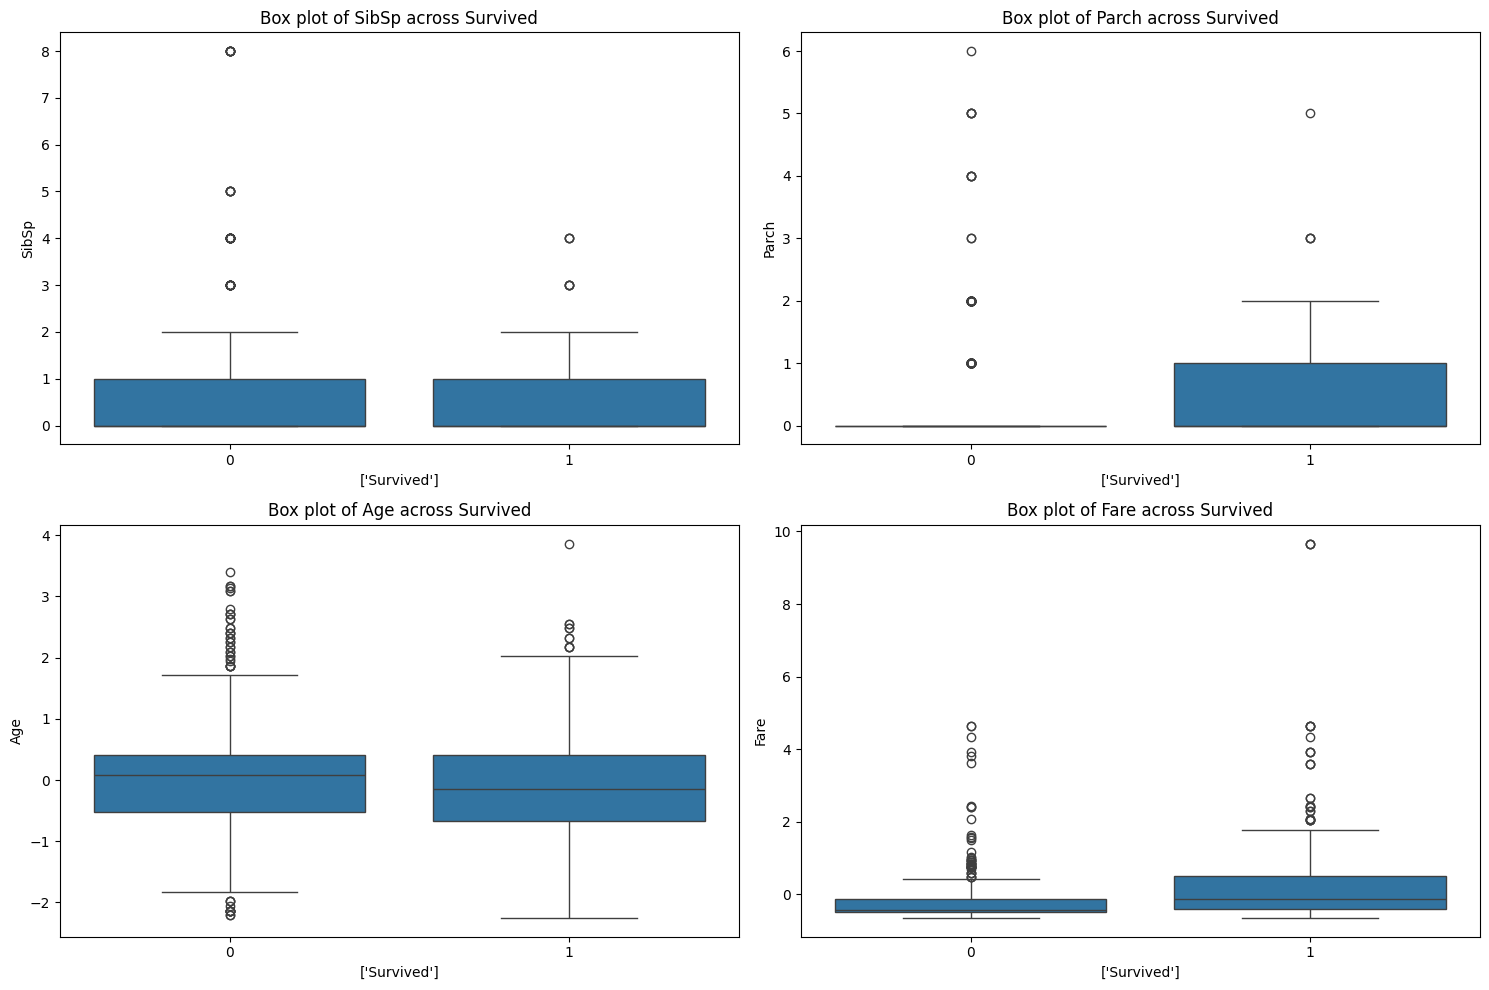

In [22]:
category = ['Survived']
variables = ['SibSp', 'Parch', 'Age', 'Fare']

# Create subplots for multiple box plots
fig, axes = plt.subplots(len(variables)//2, 2, figsize=(15, 10))

for i, variable in enumerate(variables):
    sns.boxplot(x=category[0], y=variable, data=train_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box plot of {variable} across {category[0]}')
    axes[i//2, i%2].set_xlabel(category)
    axes[i//2, i%2].set_ylabel(variable)

plt.tight_layout()
plt.show()

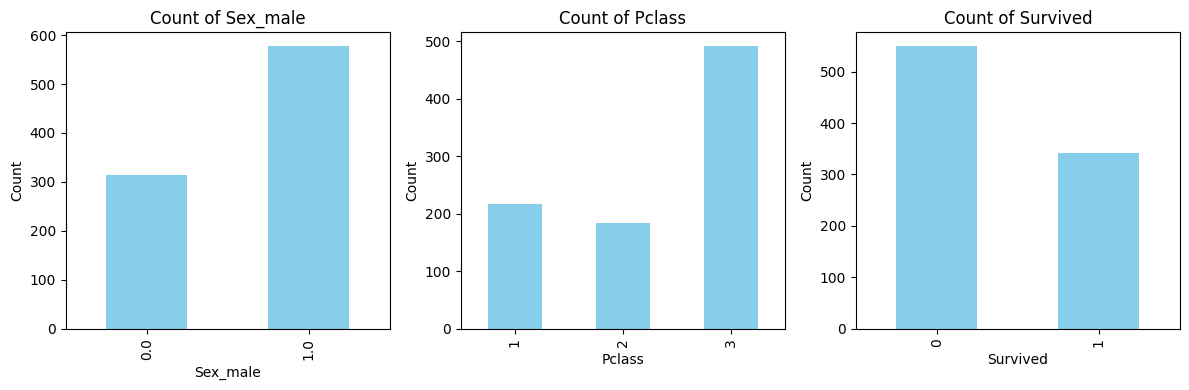

In [23]:
categorical_columns = ['Sex_male', 'Pclass', 'Survived']

# Create subplots for bar plots of categorical columns
num_cols = len(categorical_columns)

plt.figure(figsize=(12, 4))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, num_cols, i)
    train_df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Multivariate Analysis

Multivariate analysis is a powerful tool for gaining insights into complex datasets. Multivariate analysis involves the simultaneous examination of various factors that could have influenced the survival of passengers. Multivariate analysis on the Titanic dataset allows for a more comprehensive understanding of the complex interplay between multiple variables, shedding light on the various factors that played a role in the fate of passengers aboard the ill-fated ship.

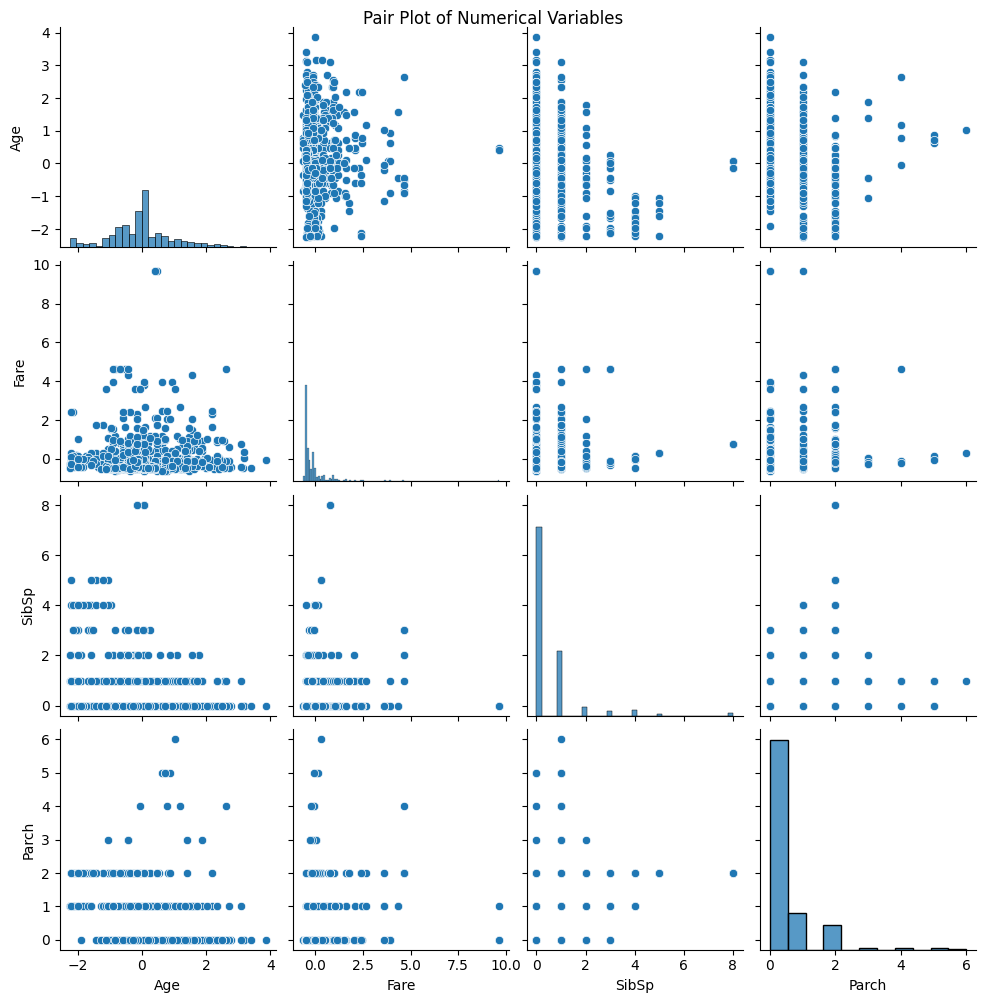

In [24]:
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(train_df[numerical_columns].dropna(), diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Variables', y=1)
plt.show()

In [25]:
train_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

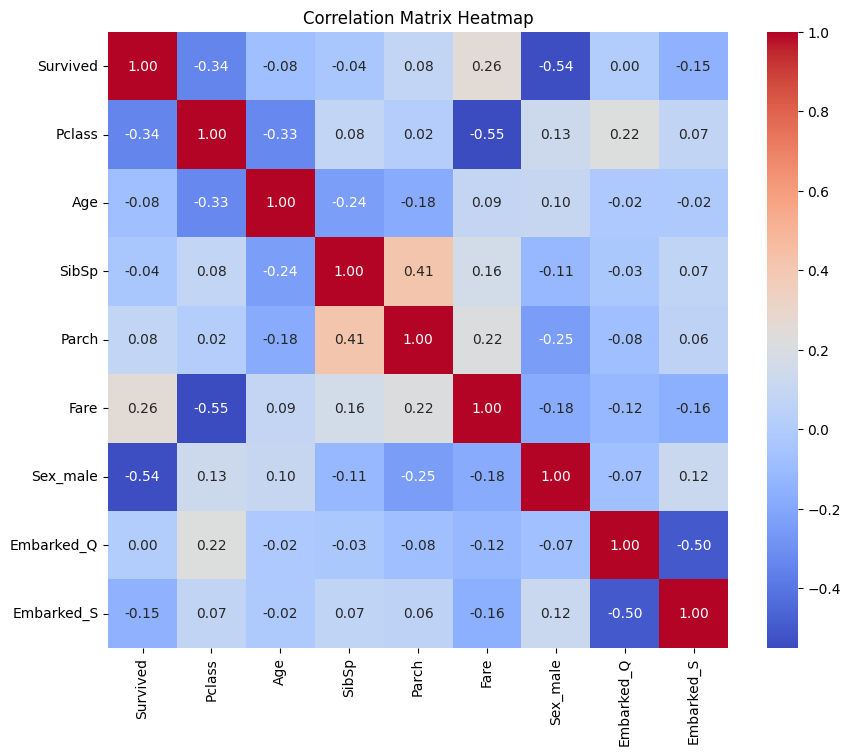

In [26]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Selection

Feature selection involves choosing a subset of relevant features from the original set of variables in a dataset, with the goal of enhancing model performance, reducing computational complexity, and improving interpretability. The importance of feature selection lies in its ability to mitigate the risk of overfitting, where a model performs well on training data but struggles with new, unseen data. By selecting the most informative and influential features, practitioners can streamline the model, making it more efficient and robust.

Chosen features:
- Pclass
- Age
- SibSp
- Parch
- Fare
- Sex_male
- Embarked_Q
- Embarked_S

## Data Processing

### Data Split

The train dataset is divided in a 90:10 split where 10% of the data is used for validation. 

In [27]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model Selection

Now that prerequisite data processing and analysis have been conducted, we can move on to the classification model development. The classifiers that will be concidered are:
- Logistic Regression
- Nearest Neighbors
- Linear Support Vector Machine
- RBF Support Vector Machine
- Decision Tree
- Random Forest
- AdaBoost

In [28]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest', 'AdaBoost']

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

In [29]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [30]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.980025,0.986577,0.960784,0.973510,0.826667,0.276761
Decision Tree,0.980025,0.993197,0.954248,0.973333,0.769231,0.005021
Nearest Neighbors,0.856429,0.830450,0.784314,0.806723,0.837838,0.003491
RBF SVM,0.831461,0.817844,0.718954,0.765217,0.794521,0.032361
AdaBoost,0.825218,0.786207,0.745098,0.765101,0.789474,0.125260
Logistic Regression,0.796504,0.756272,0.689542,0.721368,0.810811,0.011783
Linear SVM,0.784020,0.740072,0.669935,0.703259,0.767123,0.025015


In [31]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Nearest Neighbors,0.856429,0.830450,0.784314,0.806723,0.837838,0.003491
Random Forest,0.980025,0.986577,0.960784,0.973510,0.826667,0.276761
Logistic Regression,0.796504,0.756272,0.689542,0.721368,0.810811,0.011783
RBF SVM,0.831461,0.817844,0.718954,0.765217,0.794521,0.032361
AdaBoost,0.825218,0.786207,0.745098,0.765101,0.789474,0.125260
Decision Tree,0.980025,0.993197,0.954248,0.973333,0.769231,0.005021
Linear SVM,0.784020,0.740072,0.669935,0.703259,0.767123,0.025015


Preliminary validation indicates that all models train fairly well, with KNN performing the best in the train and validation metrics. The top 5 performing classifiers were selected for hyperparameter tuning.

## Hyperparameter Tuning

Hyperparameter tuning is a crucial aspect of fine-tuning machine learning models to achieve optimal performance. Hyperparameters are configuration settings external to the model itself, influencing its learning process. By selecting the optimal hyperparameters, practitioners can enhance a model's ability to generalize to new data, prevent overfitting, and ultimately improve its predictive accuracy.

In [32]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['adaboost', 'random_forest', 'svm', 'knn', 'logreg'])

    if classifier_name == 'adaboost':
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int('n_estimators', 1, 200),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'random_forest':
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),
            criterion=trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth=trial.suggest_int('max_depth', 2, 32, log=True),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 100),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 50),
            max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'svm':
        model = SVC(
            C = trial.suggest_float('C', 1e-5, 1e5, log=True),
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
#             degree = trial.suggest_int('degree', 2, 5),
#             gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) or trial.suggest_float('gamma', 1e-5, 1e5, log=True),
        )
    elif classifier_name == 'knn':
        model = KNeighborsClassifier(
            n_neighbors = trial.suggest_int('n_neighbors', 1, 30),
#             weights = trial.suggest_categorical('weights', ['uniform', 'distance']),
#             algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        )
    elif classifier_name == 'logreg':
        model = LogisticRegression(
            C=trial.suggest_float('C', 0.1, 10.0, log=True),
            random_state=trial.suggest_int('random_state', 42, 42)
        )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)

    f1 = f1_score(y_train, y_pred)

    return f1

In [33]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

best_hyperparameters = {}

for trial in study.trials:
    classifier_name = trial.params['classifier']
    if classifier_name not in best_hyperparameters or trial.value > best_hyperparameters[classifier_name]['f1_score']:
        best_hyperparameters[classifier_name] = {
            'f1_score': trial.value,
            'hyperparameters': {key: trial.params[key] for key in trial.params if key != 'classifier'}
        };

[I 2024-02-03 20:25:33,320] A new study created in memory with name: no-name-d69eab9f-907a-4af6-9532-f3dc5ad65852
[I 2024-02-03 20:25:33,354] Trial 0 finished with value: 0.720136518771331 and parameters: {'classifier': 'logreg', 'C': 0.42078099337125274, 'random_state': 42}. Best is trial 0 with value: 0.720136518771331.
[I 2024-02-03 20:25:33,388] Trial 1 finished with value: 0.7228915662650602 and parameters: {'classifier': 'logreg', 'C': 0.3183544876651641, 'random_state': 42}. Best is trial 1 with value: 0.7228915662650602.
[I 2024-02-03 20:25:33,684] Trial 2 finished with value: 0.7628524046434495 and parameters: {'classifier': 'adaboost', 'n_estimators': 65, 'learning_rate': 0.27568620636002716, 'random_state': 42}. Best is trial 2 with value: 0.7628524046434495.
[I 2024-02-03 20:25:33,784] Trial 3 finished with value: 0.7459459459459461 and parameters: {'classifier': 'knn', 'n_neighbors': 30}. Best is trial 2 with value: 0.7628524046434495.
[I 2024-02-03 20:25:33,853] Trial 4 f

[I 2024-02-03 20:27:13,061] Trial 36 finished with value: 0.7235494880546074 and parameters: {'classifier': 'logreg', 'C': 9.498863224692897, 'random_state': 42}. Best is trial 27 with value: 0.8784722222222223.
[I 2024-02-03 20:27:14,501] Trial 37 finished with value: 0.8531468531468531 and parameters: {'classifier': 'svm', 'C': 5053.255129415719, 'kernel': 'rbf'}. Best is trial 27 with value: 0.8784722222222223.
[I 2024-02-03 20:27:16,883] Trial 38 finished with value: 0.8596187175043327 and parameters: {'classifier': 'svm', 'C': 11201.18651334282, 'kernel': 'rbf'}. Best is trial 27 with value: 0.8784722222222223.
[I 2024-02-03 20:27:16,917] Trial 39 finished with value: 0.7235494880546074 and parameters: {'classifier': 'logreg', 'C': 9.675002377354952, 'random_state': 42}. Best is trial 27 with value: 0.8784722222222223.
[I 2024-02-03 20:27:16,994] Trial 40 finished with value: 0.24581005586592175 and parameters: {'classifier': 'svm', 'C': 0.0024503368098465618, 'kernel': 'linear'}.

[I 2024-02-03 20:30:02,895] Trial 76 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:02,974] Trial 77 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:03,050] Trial 78 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:03,135] Trial 79 finished with value: 0.8067226890756302 and parameters: {'classifier': 'knn', 'n_neighbors': 5}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:03,211] Trial 80 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:03,285] Trial 81 finished with value: 0.9737704918032787 and para

[I 2024-02-03 20:30:06,907] Trial 120 finished with value: 0.8067226890756302 and parameters: {'classifier': 'knn', 'n_neighbors': 5}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:06,987] Trial 121 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:07,065] Trial 122 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:07,152] Trial 123 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:07,227] Trial 124 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:07,495] Trial 125 finished with value: 0.7423076923076924 an

[I 2024-02-03 20:30:10,911] Trial 163 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:10,993] Trial 164 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:11,082] Trial 165 finished with value: 0.7641996557659207 and parameters: {'classifier': 'knn', 'n_neighbors': 7}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:11,120] Trial 166 finished with value: 0.7235494880546074 and parameters: {'classifier': 'logreg', 'C': 1.9982310748923564, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:11,227] Trial 167 finished with value: 0.75222816399287 and parameters: {'classifier': 'knn', 'n_neighbors': 21}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:11,322] Trial 168 finished with

[I 2024-02-03 20:30:15,006] Trial 207 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:15,113] Trial 208 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:15,690] Trial 209 finished with value: 0.7178502879078695 and parameters: {'classifier': 'random_forest', 'n_estimators': 181, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 30, 'min_samples_leaf': 35, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:15,790] Trial 210 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:15,894] Trial 211 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', '

[I 2024-02-03 20:30:20,253] Trial 251 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:20,340] Trial 252 finished with value: 0.756567425569177 and parameters: {'classifier': 'knn', 'n_neighbors': 9}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:20,428] Trial 253 finished with value: 0.75222816399287 and parameters: {'classifier': 'knn', 'n_neighbors': 21}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:20,509] Trial 254 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:20,592] Trial 255 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:20,675] Trial 256 finished with value: 0.8131021194605009 and 

[I 2024-02-03 20:30:24,048] Trial 294 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:24,130] Trial 295 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:24,211] Trial 296 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:24,294] Trial 297 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:24,378] Trial 298 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:24,465] Trial 299 finished with value: 0.9737704918032787 an

[I 2024-02-03 20:30:28,259] Trial 337 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:28,301] Trial 338 finished with value: 0.7032590051457975 and parameters: {'classifier': 'adaboost', 'n_estimators': 1, 'learning_rate': 0.408076725833171, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:28,384] Trial 339 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:28,480] Trial 340 finished with value: 0.7600700525394045 and parameters: {'classifier': 'knn', 'n_neighbors': 25}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:28,562] Trial 341 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:

[I 2024-02-03 20:30:33,449] Trial 379 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:33,566] Trial 380 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:33,687] Trial 381 finished with value: 0.7838827838827839 and parameters: {'classifier': 'knn', 'n_neighbors': 4}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:33,803] Trial 382 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:33,898] Trial 383 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:33,988] Trial 384 finished with value: 0.8229342327150085 an

[I 2024-02-03 20:30:37,616] Trial 422 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:37,713] Trial 423 finished with value: 0.7450271247739604 and parameters: {'classifier': 'knn', 'n_neighbors': 20}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:37,803] Trial 424 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:37,895] Trial 425 finished with value: 0.7664233576642336 and parameters: {'classifier': 'knn', 'n_neighbors': 6}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:37,978] Trial 426 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:38,075] Trial 427 finished with value: 0.0 and parameters: 

[I 2024-02-03 20:30:42,224] Trial 465 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n_neighbors': 3}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:42,312] Trial 466 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:42,393] Trial 467 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:42,485] Trial 468 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:42,764] Trial 469 finished with value: 0.7628524046434495 and parameters: {'classifier': 'adaboost', 'n_estimators': 90, 'learning_rate': 0.32672063850853295, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 2

[I 2024-02-03 20:30:46,867] Trial 508 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:46,982] Trial 509 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:47,095] Trial 510 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:47,646] Trial 511 finished with value: 0.7159090909090908 and parameters: {'classifier': 'random_forest', 'n_estimators': 157, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 55, 'min_samples_leaf': 38, 'max_features': 'log2', 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:47,765] Trial 512 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n

[I 2024-02-03 20:30:52,393] Trial 550 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:52,480] Trial 551 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:52,519] Trial 552 finished with value: 0.7226027397260275 and parameters: {'classifier': 'logreg', 'C': 0.3834337608714596, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:52,631] Trial 553 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:52,732] Trial 554 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:30:52,826] Trial 555 finished wit

[I 2024-02-03 20:31:15,393] Trial 592 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:15,537] Trial 593 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:15,633] Trial 594 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:15,767] Trial 595 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:15,882] Trial 596 finished with value: 0.7323420074349443 and parameters: {'classifier': 'knn', 'n_neighbors': 12}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:15,973] Trial 597 finished with value: 0.8131021194605009 a

[I 2024-02-03 20:31:22,326] Trial 635 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:22,535] Trial 636 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n_neighbors': 3}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:22,676] Trial 637 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:22,816] Trial 638 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:26,691] Trial 639 finished with value: 0.8043478260869564 and parameters: {'classifier': 'svm', 'C': 1303.3475087987076, 'kernel': 'poly'}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:27,144] Trial 640 finished with val

[I 2024-02-03 20:31:31,179] Trial 678 finished with value: 0.749579831932773 and parameters: {'classifier': 'adaboost', 'n_estimators': 27, 'learning_rate': 0.46281382216394445, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:31,262] Trial 679 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n_neighbors': 3}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:31,348] Trial 680 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:31,432] Trial 681 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:31,465] Trial 682 finished with value: 0.7235494880546074 and parameters: {'classifier': 'logreg', 'C': 2.496780348526263, 'random_state': 42}. Best is trial 65 with value: 0.97377

[I 2024-02-03 20:31:55,775] Trial 720 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:55,904] Trial 721 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:56,061] Trial 722 finished with value: 0.7593582887700535 and parameters: {'classifier': 'knn', 'n_neighbors': 11}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:56,176] Trial 723 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:56,342] Trial 724 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:31:56,528] Trial 725 finished with value: 0.9737704918032787 a

[I 2024-02-03 20:32:01,646] Trial 763 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:01,781] Trial 764 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:01,925] Trial 765 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:02,033] Trial 766 finished with value: 0.0 and parameters: {'classifier': 'svm', 'C': 6.041861614023009e-05, 'kernel': 'sigmoid'}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:02,175] Trial 767 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:02,292] Trial 768 finished with value: 0.813

[I 2024-02-03 20:32:09,970] Trial 806 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:10,560] Trial 807 finished with value: 0.7712854757929883 and parameters: {'classifier': 'adaboost', 'n_estimators': 123, 'learning_rate': 0.7482244642335343, 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:10,707] Trial 808 finished with value: 0.7838827838827839 and parameters: {'classifier': 'knn', 'n_neighbors': 4}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:10,923] Trial 809 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:11,095] Trial 810 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 2

[I 2024-02-03 20:32:16,717] Trial 849 finished with value: 0.7238095238095238 and parameters: {'classifier': 'random_forest', 'n_estimators': 151, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 26, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:16,814] Trial 850 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:16,910] Trial 851 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:17,041] Trial 852 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:17,190] Trial 853 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_

[I 2024-02-03 20:32:22,079] Trial 892 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n_neighbors': 3}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:22,193] Trial 893 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:22,302] Trial 894 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:22,407] Trial 895 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:22,557] Trial 896 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:42,585] Trial 897 finished with value: 0.7032590051457975 an

[I 2024-02-03 20:32:47,048] Trial 935 finished with value: 0.7372262773722628 and parameters: {'classifier': 'knn', 'n_neighbors': 14}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:47,140] Trial 936 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:47,240] Trial 937 finished with value: 0.8229342327150085 and parameters: {'classifier': 'knn', 'n_neighbors': 3}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:47,335] Trial 938 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:47,436] Trial 939 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:47,479] Trial 940 finished with value: 0.7228915662650602 a

[I 2024-02-03 20:32:51,992] Trial 978 finished with value: 0.738181818181818 and parameters: {'classifier': 'knn', 'n_neighbors': 18}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:52,087] Trial 979 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:52,184] Trial 980 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:52,276] Trial 981 finished with value: 0.9737704918032787 and parameters: {'classifier': 'knn', 'n_neighbors': 1}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:52,375] Trial 982 finished with value: 0.8131021194605009 and parameters: {'classifier': 'knn', 'n_neighbors': 2}. Best is trial 65 with value: 0.9737704918032787.
[I 2024-02-03 20:32:52,469] Trial 983 finished with value: 0.9737704918032787 an

1000 trials have been run to determine optimal hyperparameter values for the assessed classifiers. The 'optimal' hyperparameters are stated below.

In [34]:
print('Best Hyperparameters for Each Classifier:')
for classifier_name, info in best_hyperparameters.items():
    print(f"\nClassifier: {classifier_name}")
    print(f"F1 Score: {info['f1_score']}")
    print("Hyperparameters:")
    for key, value in info['hyperparameters'].items():
        print(f"  {key}: {value}")

Best Hyperparameters for Each Classifier:

Classifier: logreg
F1 Score: 0.7279029462738302
Hyperparameters:
  C: 0.17693829061751623
  random_state: 42

Classifier: adaboost
F1 Score: 0.7959866220735785
Hyperparameters:
  n_estimators: 195
  learning_rate: 0.868627939380094
  random_state: 42

Classifier: knn
F1 Score: 0.9737704918032787
Hyperparameters:
  n_neighbors: 1

Classifier: svm
F1 Score: 0.8784722222222223
Hyperparameters:
  C: 99805.76011969008
  kernel: rbf

Classifier: random_forest
F1 Score: 0.8291814946619216
Hyperparameters:
  n_estimators: 101
  criterion: log_loss
  max_depth: 25
  min_samples_split: 23
  min_samples_leaf: 3
  max_features: None
  random_state: 42


In [35]:
classifier_mapping = {'knn': KNeighborsClassifier,
                      'random_forest': RandomForestClassifier,
                      'logreg': LogisticRegression,
                      'adaboost': AdaBoostClassifier,
                      'svm': SVC}

hyperparameters_list = list(best_hyperparameters.items())

names = [
    classifier_type
    for classifier_type, metrics in hyperparameters_list
]

classifiers = [
    classifier_mapping[classifier_type](**metrics['hyperparameters'])
    for classifier_type, metrics in hyperparameters_list
]

results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting logreg model...
... predicting
... scoring
Fitting adaboost model...
... predicting
... scoring
Fitting knn model...
... predicting
... scoring
Fitting svm model...
... predicting
... scoring
Fitting random_forest model...
... predicting
... scoring
... All done!


In [36]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
logreg,0.803995,0.774908,0.686275,0.727903,0.810811,0.008673
adaboost,0.847690,0.815068,0.777778,0.795987,0.810127,0.437617
random_forest,0.880150,0.910156,0.761438,0.829181,0.794521,0.346065
knn,0.980025,0.976974,0.970588,0.973770,0.769231,0.002862
svm,0.912609,0.937037,0.826797,0.878472,0.750000,17.003155


After reassessing the tuned classifiers, it can be see that the adaboost and random forest classifiers performed well and consistently on both the train and validation sets.

## Test Set Evaluation

The tuned models are now applied to the test dataset. to determine the model performance on unseen data. 

In [37]:
results = []

confusion = {}
class_report = {}

y_test = gender_df['Survived']

for name, clf in models.items():
    print ('... predicting')
    y_pred = clf.predict(test_df)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall    = metrics.recall_score(y_test, y_pred)

    f1        = metrics.f1_score(y_test, y_pred)

    confusion[name] = metrics.confusion_matrix(y_test, y_pred)
    class_report[name] = metrics.classification_report(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

... predicting
... scoring
... predicting
... scoring
... predicting
... scoring
... predicting
... scoring
... predicting
... scoring
... All done!


In [38]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Test
Classifier,,,,
logreg,0.937799,0.920000,0.907895,0.913907
random_forest,0.921053,0.916084,0.861842,0.888136
adaboost,0.887560,0.852349,0.835526,0.843854
svm,0.779904,0.720588,0.644737,0.680556
knn,0.698565,0.575581,0.651316,0.611111


It can be seen that the top 3 performing classifiers by F1 score are the logistic regression, random forest and adaboost classifiers.

## Conclusion

In conclusion, the evaluation of various classifier models revealed Logistic Regression, Random Forest, and AdaBoost, performed commendably with respect to the F1 test metric. However, upon closer examination, there were indications that Logistic Regression and Random Forest may be susceptible to underfitting, potentially limiting their predictive capabilities on unseen data.

After careful consideration and weighing the strengths and weaknesses of each model, the decision has been made to adopt AdaBoost as the preferred classifier. AdaBoost demonstrated robust performance on the F1 test while showcasing resilience against underfitting concerns. Its ability to iteratively enhance the performance of weak learners and adapt to complex patterns in the data makes it a suitable choice for the given task.

By selecting AdaBoost, I aim to strike a balance between predictive accuracy and generalization capabilities, ensuring the model's effectiveness in real-world scenarios. This decision is rooted in the goal of achieving a reliable and robust classifier that can generalize well to unseen data, contributing to the success of our predictive modeling endeavors.

I conclude this document by saving this model for future use.

In [39]:
classifier = None

for key, value in models.items():
    if 'adaboost' in key:
        classifier = value

In [40]:
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)